<a href="https://colab.research.google.com/github/akankshagrahari/AIMLMonth2023/blob/main/Copy_of_major_project%3C23236%2C_23030%2C_23028%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAJOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

<-----------------------Question 1----------------------------->

Ques 1: Are there any missing values and duplicate instances in the dataset? If so, how do you plan to handle them?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define a file path on your Google Drive
file_path = url = 'https://drive.google.com/uc?id={}'.format('1HWAzrDKQWzZZ40_ldNIKpqsDuFyKklcH')

# Load or save your CSV using the file_path
data = pd.read_csv(file_path)



In [ ]:
data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicate instances
duplicate_instances = data.duplicated().sum()
print("\nDuplicate instances:", duplicate_instances)

# Handling missing values
# Drop rows with any missing values
df_cleaned = data.dropna()

# Handling duplicate instances
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

Missing values:
 product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

Duplicate instances: 0


<-----------------------Question 2----------------------------->

Ques 2: What are the top-rated products based on user reviews? Can you identify the products with the highest average rating?

In [ ]:

# Group the data by product and calculate the average rating for each product
average_ratings = data.groupby('product_id')['rating'].mean()

# Sort the products based on average rating in descending order
top_rated_products = average_ratings.sort_values(ascending=False)

# Print the top-rated products
print("Top-rated products:")
print(top_rated_products.head(10))

Top-rated products:
product_id
P480445    5.0
P504207    5.0
P502481    5.0
P504994    5.0
P390009    5.0
P505011    5.0
P500409    5.0
P500408    5.0
P449144    5.0
P501233    5.0
Name: rating, dtype: float64


<-----------------------Question 3----------------------------->

Ques 3: comparision number of users giving review vs rating and prize vs rating

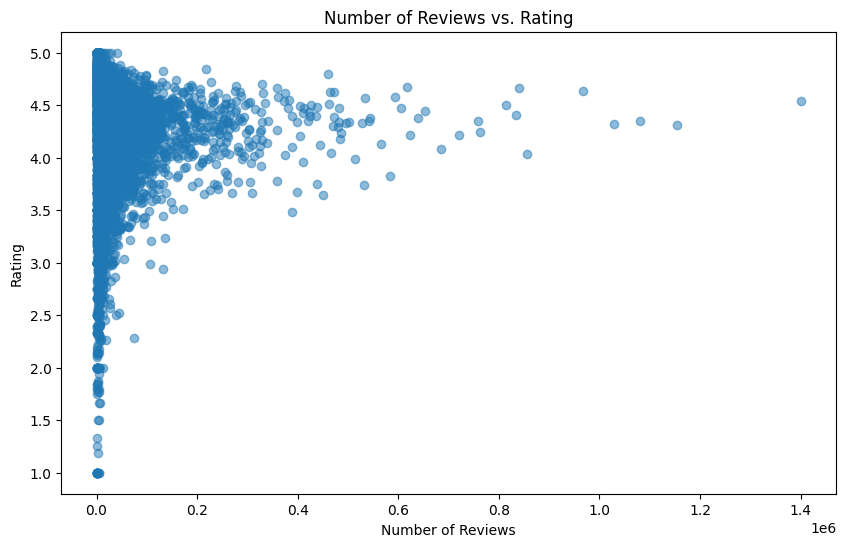

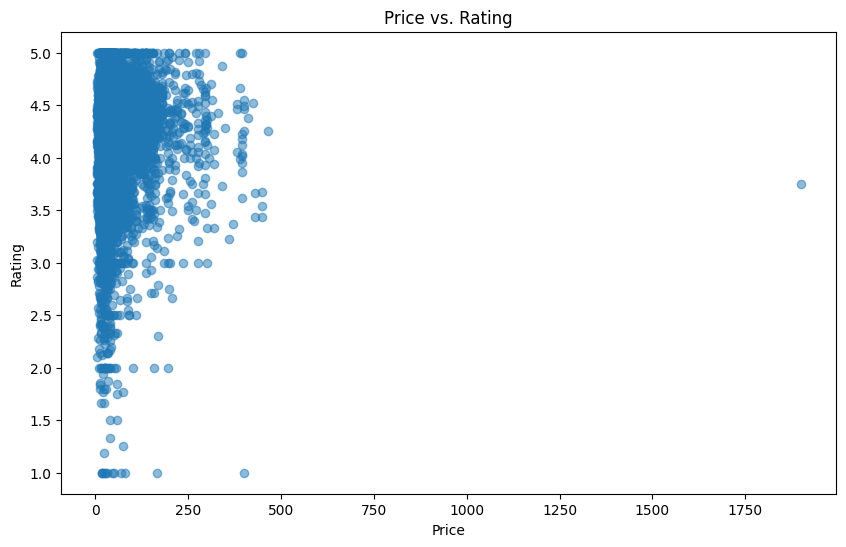

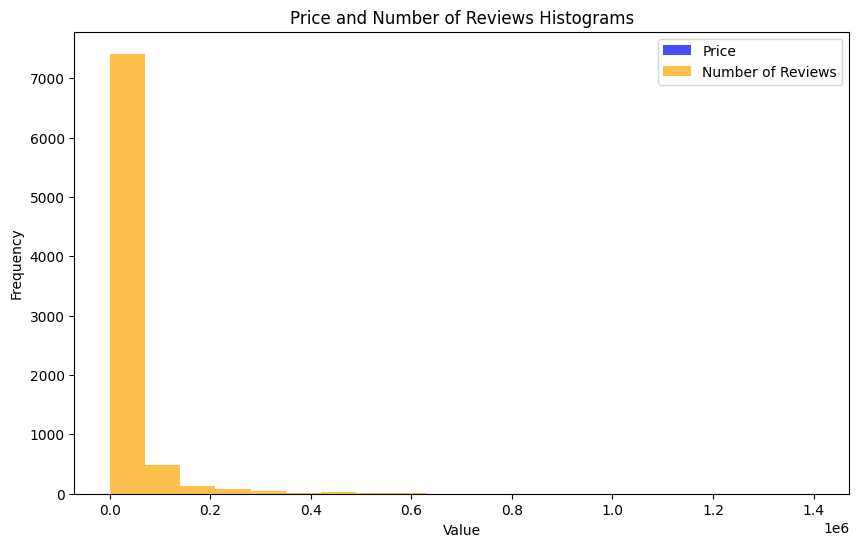

In [ ]:
                                                                                                                                                                                                                   import pandas as pd
import matplotlib.pyplot as plt

# Filter out rows with missing values in "number_of_reviews", "rating", and "price"
filtered_data = data.dropna(subset=["loves_count", "rating", "price_usd"])

# Create scatter plot: Number of Reviews vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data["loves_count"], filtered_data["rating"], alpha=0.5)
plt.title("Number of Reviews vs. Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

# Create scatter plot: Price vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data["price_usd"], filtered_data["rating"], alpha=0.5)
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

# Create histograms for Price and Number of Reviews
plt.figure(figsize=(10, 6))
plt.hist(filtered_data["price_usd"], bins=20, alpha=0.7, color='blue', label='Price')
plt.hist(filtered_data["loves_count"], bins=20, alpha=0.7, color='orange', label='Number of Reviews')
plt.title("Price and Number of Reviews Histograms")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<-----------------------Question 4----------------------------->

Ques 4: Which products have the highest "love" count based on user reviews? Can you identify any patterns between highly-loved products and their attributes?

Top Loved Products:
                                           product_name  loves_count  rating  \
6242                            Soft Pinch Liquid Blush      1401068  4.5356   
5249                           Radiant Creamy Concealer      1153594  4.3080   
4431  Lip Sleeping Mask Intense Hydration with Vitam...      1081315  4.3508   
6434                    Cream Lip Stain Liquid Lipstick      1029051  4.3201   
2523                 Gloss Bomb Universal Lip Luminizer       968317  4.6357   

      price_usd                   brand_name  
6242       23.0  Rare Beauty by Selena Gomez  
5249       32.0                         NARS  
4431       24.0                      LANEIGE  
6434       15.0           SEPHORA COLLECTION  
2523       21.0      Fenty Beauty by Rihanna  


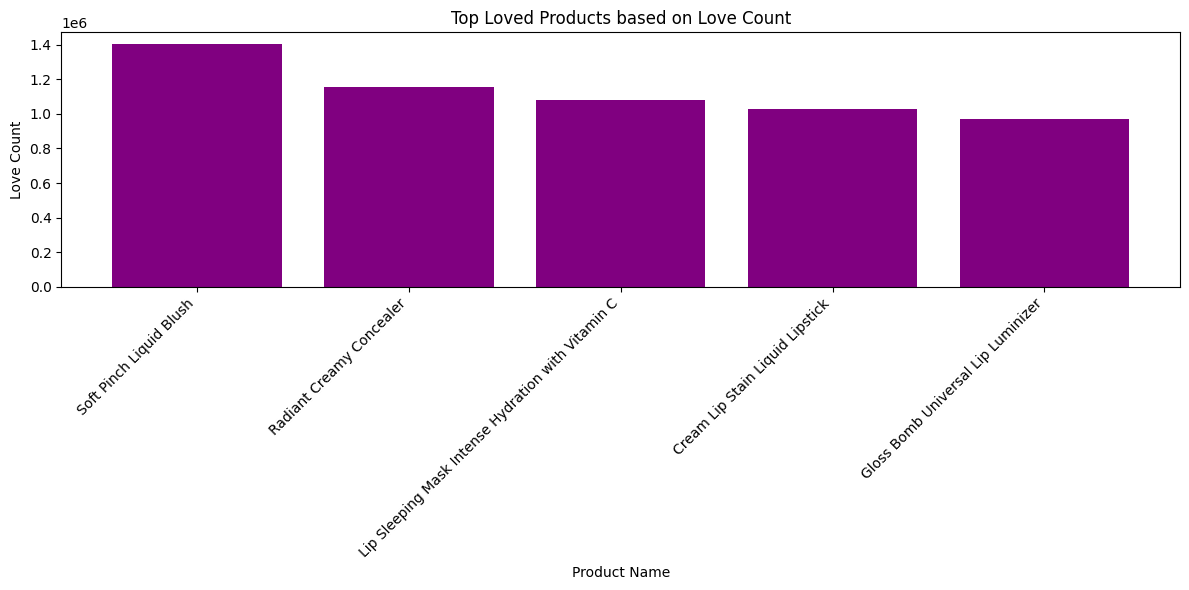

In [ ]:
# Filter out rows with missing values in the "love" column
filtered_data = data.dropna(subset=["loves_count"])

# Sort the data by "love" count in descending order
sorted_data = filtered_data.sort_values(by="loves_count", ascending=False)

# Display the top products with the highest "love" count
top_loved_products = sorted_data[["product_name", "loves_count", "rating", "price_usd", "brand_name"]].head()
print("Top Loved Products:")
print(top_loved_products)

# Create a bar plot: Top Loved Products vs. Love Count
plt.figure(figsize=(12, 6))
plt.bar(top_loved_products["product_name"], top_loved_products["loves_count"], color='purple')
plt.title("Top Loved Products based on Love Count")
plt.xlabel("Product Name")
plt.ylabel("Love Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<-----------------------Question 5----------------------------->

Ques 5: Divide the data into primary category distributions

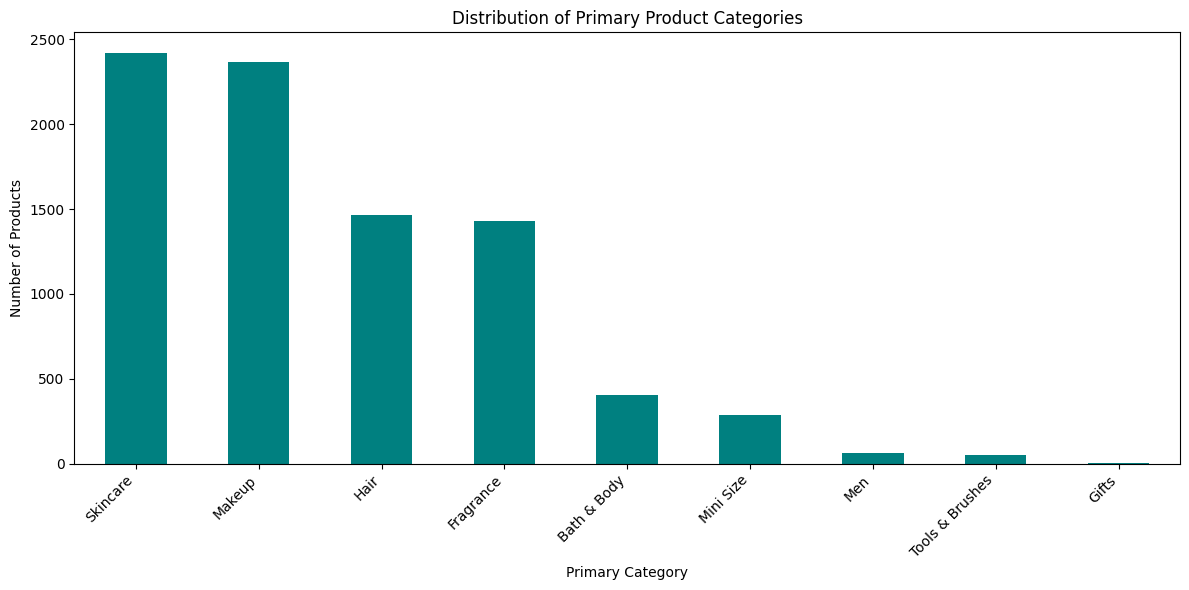

In [ ]:
#primary category distributions

# Calculate the distribution of primary categories
category_distribution = data['primary_category'].value_counts()

# Create a bar plot for category distribution
plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar', color='teal')
plt.title("Distribution of Primary Product Categories")
plt.xlabel("Primary Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



# Data Preprocessing
data.dropna(subset=['rating'], inplace=True)

# Create a function to categorize sentiment based on ratings
def categorize_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorization function to create a new 'sentiment' column
data['sentiment'] = data['rating'].apply(categorize_sentiment)

# Feature Engineering
data['combined_text'] = data['brand_name'] + ' ' + data['product_name']

# Split dataset in train-test (80:20 ratio)
X = data['combined_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Model selection (Naive Bayes)
model = MultinomialNB()

# Model training
model.fit(X_train_vectorized, y_train)

# Model evaluation
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7396593673965937
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.53      0.10      0.17       425
    positive       0.75      0.97      0.85      1211

    accuracy                           0.74      1644
   macro avg       0.43      0.36      0.34      1644
weighted avg       0.69      0.74      0.67      1644



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
